# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np # it is used for matric statistic Mathematics
import matplotlib.pyplot as plt #it is used for visualization
import pandas as pd # it is used for data cleaning and data analysis

## Importing the dataset

In [3]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
dataset.describe(include='object') #statistical information on column type string

,State
count,50
unique,3
top,New York
freq,17


In [7]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
dataset.iloc[5,:] #row 5 all columns

R&D Spend           131876.9
Administration      99814.71
Marketing Spend    362861.36
State               New York
Profit             156991.12
Name: 5, dtype: object

In [9]:
dataset.iloc[0:5,:]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
dataset.iloc[:,-1]

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [ ]:
#We have to create the x=independent valriable
#We have to create the Y=Dependent varaible

In [11]:
X = dataset.iloc[:, :-1].values # it will take the values of each column except the last column
y = dataset.iloc[:, -1].values # it will take the values of only 

In [12]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [13]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Encoding categorical data

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [15]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Training the Multiple Linear Regression model on the Training set

In [17]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:

#predict the test
pretcited_value=regressor.predict(X_test)


In [20]:
pretcited_value

array([126362.87908251,  84608.45383643,  99677.49425155,  46357.46068584,
       128750.48288497,  50912.41741906, 109741.35032701, 100643.24281644,
        97599.275746  , 113097.42524439])

In [21]:
print('Intercept',regressor.intercept_)
print('Intercept',regressor.coef_)

Intercept 54343.29984943484
Intercept [-3.15260255e+02  6.23532751e+02 -3.08272495e+02  8.05630064e-01
 -6.87878823e-02  2.98554429e-02]


## RMSE and R2

Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]

Where:
* R2: R-squared
* n: Number of observations
* k: Number of independent variables

## Adjusted R2

## Performance Table

In [22]:
newdf=pd.DataFrame(columns=["Actual Value","Predicted","Error"])

In [23]:
newdf['Actual Value']=y_test
newdf['Predicted']=pretcited_value
newdf['Error']=newdf['Actual Value']-newdf['Predicted']

In [24]:
newdf

,Actual Value,Predicted,Error
0,134307.35,126362.879083,7944.470917
1,81005.76,84608.453836,-3602.693836
2,99937.59,99677.494252,260.095748
3,64926.08,46357.460686,18568.619314
4,125370.37,128750.482885,-3380.112885
5,35673.41,50912.417419,-15239.007419
6,105733.54,109741.350327,-4007.810327
7,107404.34,100643.242816,6761.097184
8,97427.84,97599.275746,-171.435746
9,122776.86,113097.425244,9679.434756


In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [26]:

print(X_train[:,3])

[93863.75 142107.34 44069.95 120542.52 144372.41 134615.46 27892.92
 1315.46 0.0 114523.61 123334.88 78013.11 77044.01 46426.07 61136.38
 165349.2 22177.74 72107.6 55493.95 131876.9 65605.48 100671.96 28663.76
 162597.7 78389.47 153441.51 15505.73 46014.02 67532.53 28754.33 101913.08
 73994.56 91749.16 0.0 76253.86 130298.13 23640.93 119943.24 66051.52
 20229.59]


In [27]:
y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[126362.88 134307.35]
 [ 84608.45  81005.76]
 [ 99677.49  99937.59]
 [ 46357.46  64926.08]
 [128750.48 125370.37]
 [ 50912.42  35673.41]
 [109741.35 105733.54]
 [100643.24 107404.34]
 [ 97599.28  97427.84]
 [113097.43 122776.86]]


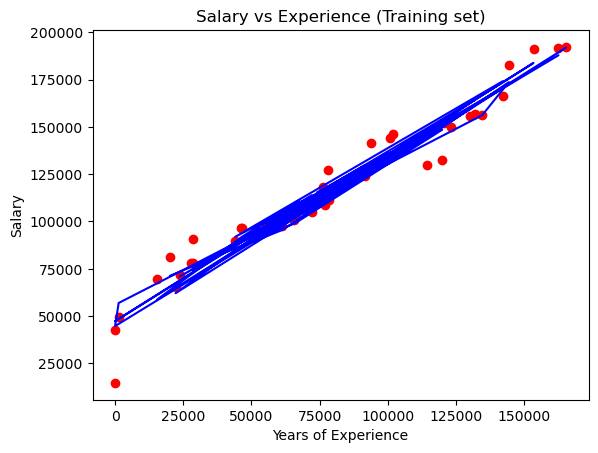

In [28]:
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

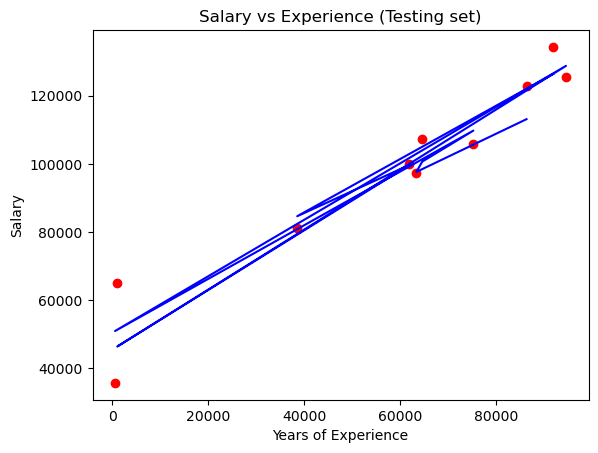

In [30]:
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [29]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Manual Implementation

<a id='1'></a>
## Gradient Descent Implementation

[Top](#top)

## Equations 
Objective of Linear Regression is to minimize the cost function: 
<br>
$\Large J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$
<br>
<br>
where the hypothesis $h_\theta(x)$ is given by the lienar model:  

$\Large h_\theta(x) = \theta^T X = \theta_1 X_1 + \theta_0 $  
<br>
In batch gradient descent, each iteration performs the update:  
$\Large \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}$


In [50]:
x_manual = X.copy()
y_manual = y.copy()

In [51]:
def featureNormalize(x_m):
    mu = np.zeros((1,x_m.shape[1]))
    sigma = np.zeros((1,x_m.shape[1]))
    x_norm = x_m.astype(float)
    
    for i in range(0,len(mu)+1):
        mu[:,i] = x_m[:,i].mean()
        sigma[:,i] = x_m[:,i].std()
        x_norm[:,i] = (x_m[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

In [52]:
x_norm, mu, sigma = featureNormalize(x_manual)
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)

In [53]:
def computeCost_m(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

In [54]:
def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    m = len(Y)
    p = np.copy(X)
    t = np.copy(theta)
    j = []
    print('Running Gradient Descent')
    for i in range(0,num_iters+1):
        cost = computeCost_m(p, Y, t)
        j.append(cost)
        h_x = np.dot(p, t)
        err = h_x - Y
        for f in range(theta.size):
            t[f] = t[f] - alpha/m *(np.sum((np.dot(p[:,f].T, err))))
    return j, t

Running Gradient Descent


/var/folders/_j/spp5p94n6w9b98f6d85t52mc0000gn/T/ipykernel_1848/457181602.py:4: RuntimeWarning: overflow encountered in square
  j = np.sum(np.square(h_x - y))/(2*m+1e-6)


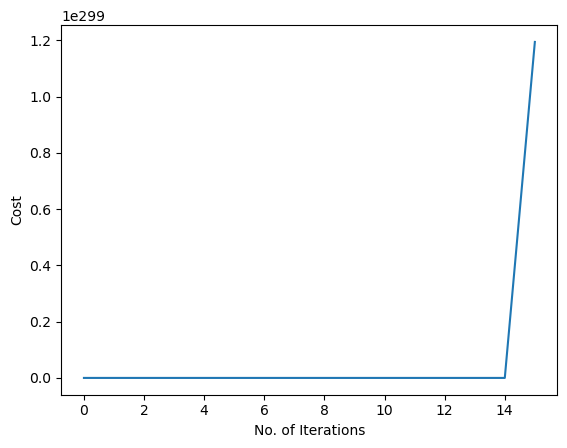

In [61]:
alpha = 0.001
num_iters = 5000
theta_init = np.zeros((7, 1)) # 7 columns
cost, theta_final = gradientDescentMulti(x_norm, y_manual, theta_init, alpha, num_iters)

plt.figure()
plt.plot(cost)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

In [59]:
theta_final

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])